In [64]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [65]:
# Load the pre-trained model (Alexnet or VGG)
#model = models.alexnet(pretrained=True)
model = models.vgg11(pretrained=True)

# Set the model to evaluation mode
model.eval()

/Users/garychang/opt/anaconda3/envs/CourseML/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/garychang/opt/anaconda3/envs/CourseML/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [66]:
# Load an image
#img_path = 'yoda.jpg'
img_path = 'bullmastiff.png'
img = Image.open(img_path)

# Define a transform to preprocess the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply the transform and add an extra batch dimension
img = transform(img).unsqueeze(0)

In [67]:
# Lets examine the shape of feature maps when the image was forwarded through each layer of the network
# A list to store feature maps
feature_maps = []
feature_layers = model.features
img_tensor = 1 * img
print("Original Image Size")
print(img_tensor.shape)
for i, layer in enumerate(feature_layers):
    if isinstance(layer, nn.Conv2d):
        print("After layer " + str(i)  + ", which is a convolutional layer, feature map = " + str(img_tensor.shape))
    elif isinstance(layer, nn.ReLU):
        print("After layer " + str(i)  + ", which is a ReLU activation layer = " + str(img_tensor.shape))
    elif isinstance(layer, nn.MaxPool2d):
        print("After layer " + str(i)  + ", which is a max pooling layer = " + str(img_tensor.shape))
    img_tensor = layer(img_tensor)
    feature_maps.append(img_tensor)


Original Image Size
torch.Size([1, 3, 224, 224])
After layer 0, which is a convolutional layer, feature map = torch.Size([1, 3, 224, 224])
After layer 1, which is a ReLU activation layer = torch.Size([1, 64, 224, 224])
After layer 2, which is a max pooling layer = torch.Size([1, 64, 224, 224])
After layer 3, which is a convolutional layer, feature map = torch.Size([1, 64, 112, 112])
After layer 4, which is a ReLU activation layer = torch.Size([1, 128, 112, 112])
After layer 5, which is a max pooling layer = torch.Size([1, 128, 112, 112])
After layer 6, which is a convolutional layer, feature map = torch.Size([1, 128, 56, 56])
After layer 7, which is a ReLU activation layer = torch.Size([1, 256, 56, 56])
After layer 8, which is a convolutional layer, feature map = torch.Size([1, 256, 56, 56])
After layer 9, which is a ReLU activation layer = torch.Size([1, 256, 56, 56])
After layer 10, which is a max pooling layer = torch.Size([1, 256, 56, 56])
After layer 11, which is a convolutional l

Here, we print out some of the sample feature map after each maxpooling layer. Can you modify the code to make it also print out the feature maps after each convolutional layer so you can see how pooling layer function?

Original Image Size
torch.Size([1, 3, 224, 224])
After layer 2, which is a max pooling layer


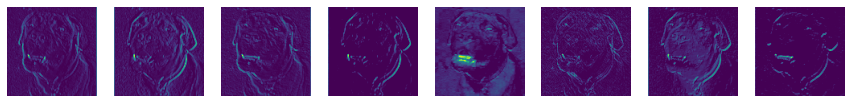

After layer 5, which is a max pooling layer


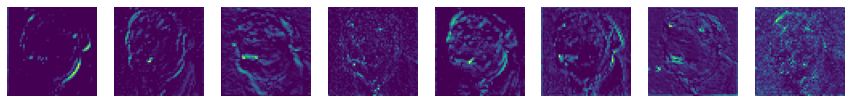

After layer 10, which is a max pooling layer


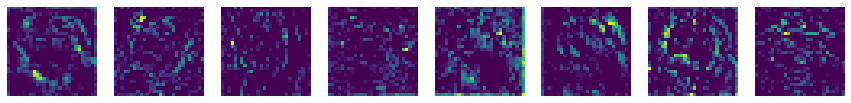

After layer 15, which is a max pooling layer


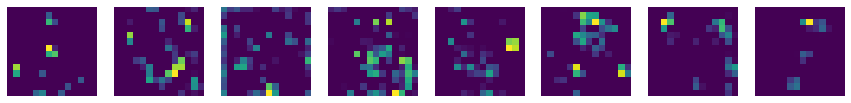

After layer 20, which is a max pooling layer


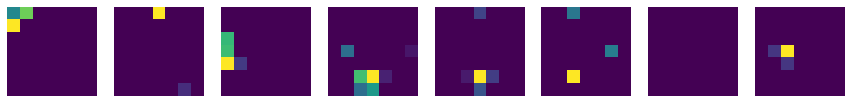

In [68]:
import torch
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt

# Assume img_tensor is a pre-defined input tensor
# Assume model is a pre-defined model (e.g., AlexNet)

feature_maps = []
feature_layers = model.features

print("Original Image Size")
img_tensor = 1 * img
print(img_tensor.shape)

for i, layer in enumerate(feature_layers):
    img_tensor = layer(img_tensor)

    if (isinstance(layer, nn.MaxPool2d)):#
    #if (isinstance(layer, nn.Conv2d)):
        if isinstance(layer, nn.Conv2d):
            print("After layer " + str(i)  + ", which is a convolutional layer")
        elif isinstance(layer, nn.MaxPool2d):
            print("After layer " + str(i)  + ", which is a max pooling layer")
        #print("After layer " + str(i)  + ", This is a max pooling layer")
        #print(img_tensor.shape)  # Print shape after max-pooling layer

        # Append feature map after max-pooling layer
        feature_maps.append(img_tensor)

        # Display the first 8 feature maps
        num_feature_maps = min(8, img_tensor.size(1))
        fig, axs = plt.subplots(1, num_feature_maps, figsize=(15, 15))

        for j in range(num_feature_maps):
            axs[j].imshow(img_tensor[0, j].detach().numpy(), cmap='viridis')
            axs[j].axis('off')

        plt.show()

In [61]:
# the feature fed into the classifier is the last component in the feature list
extracted_features = feature_maps[-1]
extracted_features = extracted_features.view(1, -1)
logit = model.classifier(extracted_features)
print('Shape of the classifier output: ' + str(logit.shape))
_, max_class = torch.max(logit, 1)
print('number of the maximum class :' + str(max_class))

Shape of the classifier output: torch.Size([1, 1000])
number of the maximum class :tensor([367])
